# Introduction - Import Libraries Used For Analysis

In [3]:
# EDA - Data Cleaning
import pandas as pd
import numpy as np
import missingno
from collections import Counter
import math

# EDA - Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [4]:
sns.__version__

'0.11.1'

# Import and read data

## train = Customer Churn raw dataset (51,047 customers)

In [5]:
train1 = pd.read_csv('../data/raw/cell2celltrain.csv')
test = pd.read_csv('../data/raw/cell2cellholdout.csv')
train = train1.append(test)
print('Shape of train dataset:', train.shape)
print('Shape of test dataset:', test.shape)

Shape of train dataset: (71047, 58)
Shape of test dataset: (20000, 58)


# Exploratory Data Analysis (EDA)

## Handling Missing Data

In [6]:
#Review the columns with null values in the dataset
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending = False), columns=['Amount'])
nulls = nulls.loc[nulls['Amount'] > 0]
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls = pd.DataFrame(nulls.loc[nulls['Amount'] > 0])
# print('Shape of train dataset:', train.shape, '\nMissing values for train dataset below:\n', nulls)
nulls.index.name='Columns With Missing Values'
nulls

,Amount
Columns With Missing Values,
Churn,20000
AgeHH1,1244
AgeHH2,1244
PercChangeMinutes,502
PercChangeRevenues,502
MonthlyRevenue,216
MonthlyMinutes,216
TotalRecurringCharge,216
DirectorAssistedCalls,216


<b> Findings </b>: There are a number of customers with missing information.

<b> Action to Take </b>: Remove the missing values for the following columns:

    - ServiceArea (28)
    - HandsetModels (1)
    - CurrentEquipmentDays (1)
    - Handsets (1)

In [7]:
print('Length of dataset - before: ', len(train))
before = len(train)
#Remove missing columns based on the above action taken
train = train.loc[(train['ServiceArea'].notnull()) &
                 (train['HandsetModels'].notnull()) &
                 (train['CurrentEquipmentDays'].notnull()) &
                 (train['Handsets'].notnull())]

print('Length of dataset - after: ', len(train))
after = len(train)
print('Number of columns removed: ', before-after)

Length of dataset - before:  71047
Length of dataset - after:  71018
Number of columns removed:  29


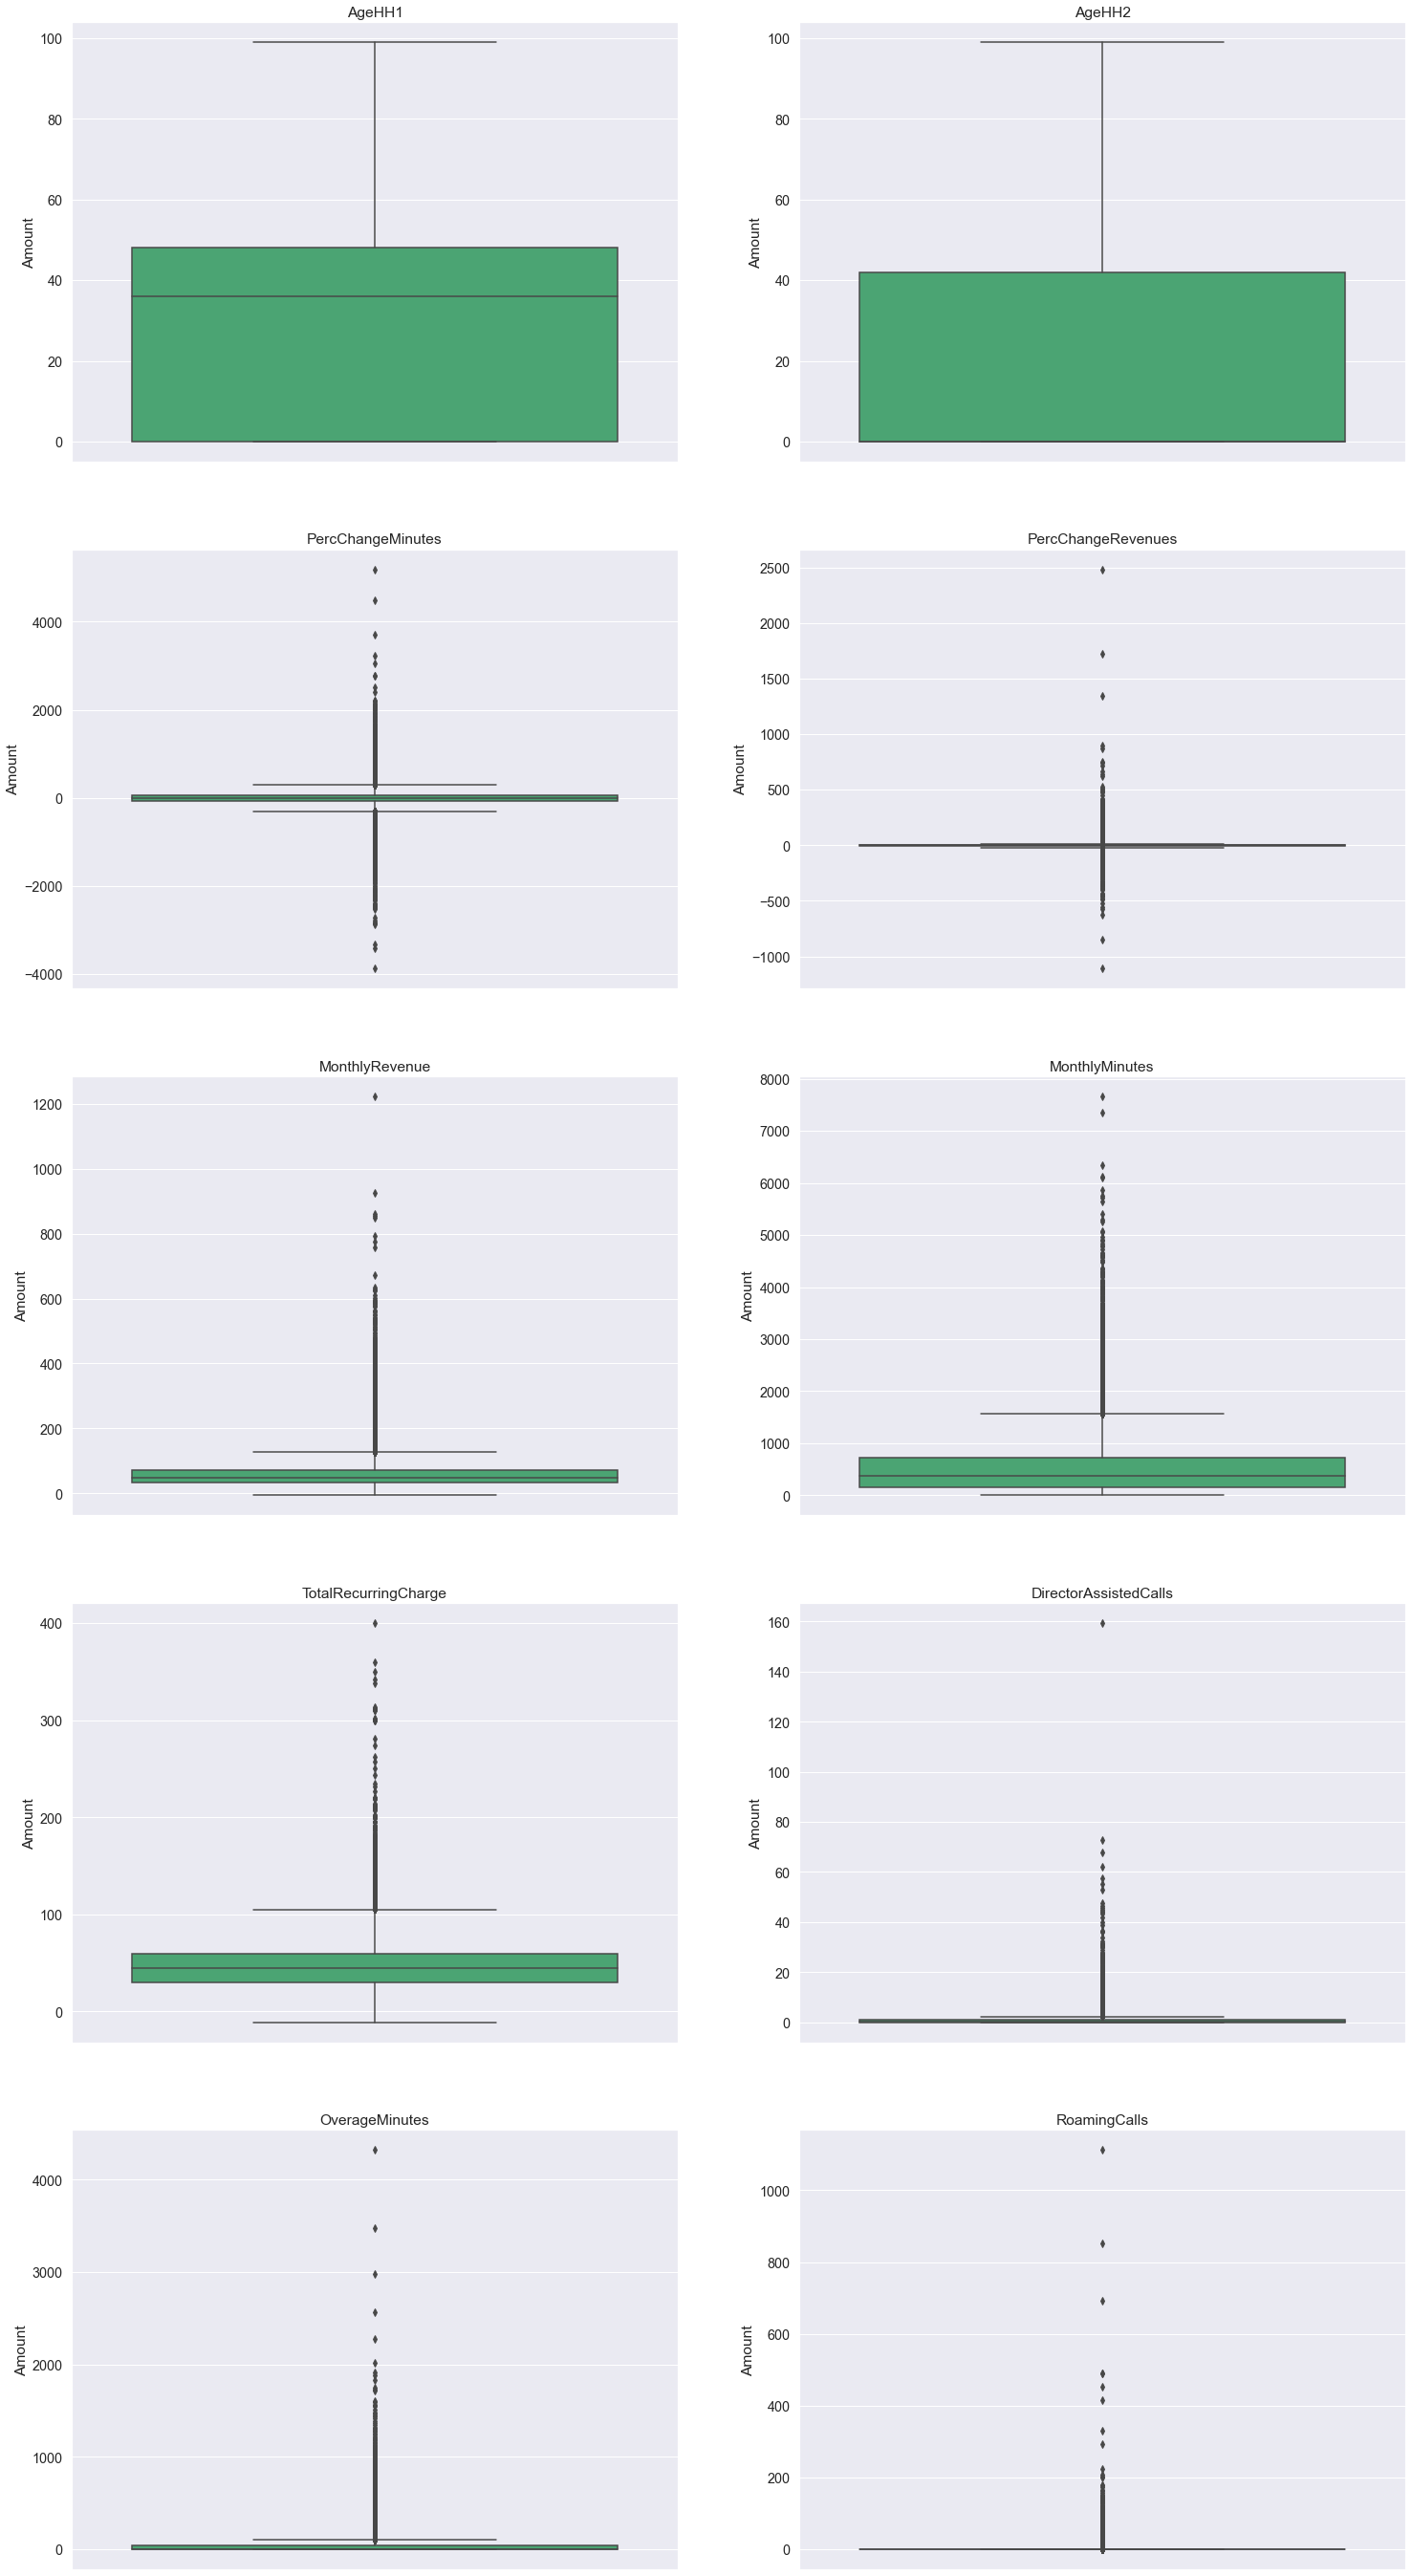

In [8]:
#select the columns names of the remaining variables with null values and enumerate
feature_obj = list(enumerate(['AgeHH1', 'AgeHH2', 'PercChangeMinutes', 'PercChangeRevenues',
       'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls']))


plt.figure(figsize = (25,120))
sns.set(font_scale = 1.3)

for i in feature_obj:
    plt.subplot(12,2,i[0]+1)
    sns.boxplot(y = i[1],
                data = train,
                color='mediumseagreen')
    
#     plt.ylabel('Customer Count')
    plt.title(str(i[1]))
    plt.ylabel('Amount')
    plt.xticks(rotation = 45)

<b> Actions to take: </b>  As a preliminary step, I am going to replace the median value with the columns that have missing values:

    - PercChangeMinutes
    - PercChangeRevenues
    - MonthlyRevenue
    - MonthlyMinutes
    - TotalRecurringCharge
    - DirectorAssistedCalls
    - OverageMinutes
    - RoamingCalls
    
<b> Next: </b> Assess the age column and look at values that may be zero. This would be the equivalent to a missing value.

In [9]:
ea = ['PercChangeMinutes', 'PercChangeRevenues',
       'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls']

for col in ea:
    train.fillna(train[ea].median(), inplace=True)

In [10]:
print('The number of values where age equals 0 are:',
      train.loc[(train['AgeHH1']==0)].shape[0], 
     'out of a total of', len(train))

The number of values where age equals 0 are: 19314 out of a total of 71018


<b> Actions to take: </b>  I am going to replace the missing values in the Age columns with median value.

In [11]:
train.AgeHH1.replace(to_replace=0,
                 value=np.nan,
                 inplace=True)

train.AgeHH2.replace(to_replace=0,
                 value=np.nan,
                 inplace=True)

ea = ['AgeHH1', 'AgeHH2']

for col in ea:
    train.fillna(train[ea].median(), inplace=True)

## Feature analysis

### Assess Customer Churn Ratio

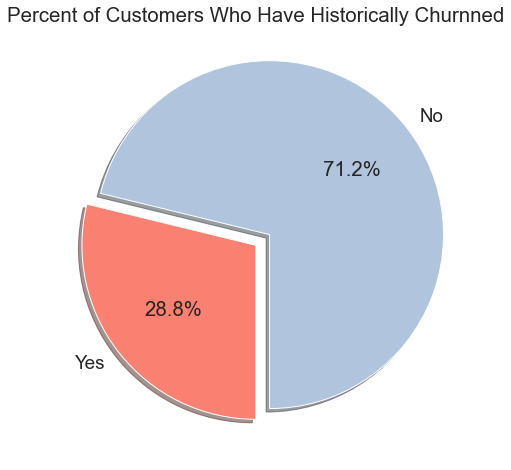

In [12]:
# Data to plot for the % of target variable
sns.set(font_scale = 1.7)
labels =train['Churn'].value_counts(sort = True).index
sizes = train['Churn'].value_counts(sort = True)
colors = ["lightsteelblue","salmon"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of Customers Who Have Historically Churnned')
plt.show()

### Review Categorical Column Values

In [13]:
# Review Categorical Column Outputs
train_obj = train.drop("CustomerID", axis= 1)

for col in train_obj.dtypes[train_obj.dtypes == object].index:
    print(col,'\n', train_obj[col].unique())

Churn 
 ['Yes' 'No' nan]
ServiceArea 
 ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'NNYROC716' 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602'
 'NNYBUF716' 'DETTOL419' 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'SEABLV425'
 'MIAMIA305' 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812'
 'MIADEL561' 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYCNAS516' 'NSHCOL615'
 'PITGRE412'

<b> Action Item: </b> The Handset price is primarily numerical in nature. I am replacing 'Unknown' with 0 and converting it to a numerical variable.

In [14]:
# Convert Handset Price to Numerical Value - Replace Unknown with 0
train.HandsetPrice.replace({'Unknown': 0}, inplace=True)
train['HandsetPrice'] = train['HandsetPrice'].astype(int)

<b>Action Item:</b> The IncomeGroups column is essentially a categorical-type column, so I am converting it to a string to be used in the next steps.

In [15]:
train['IncomeGroup'] = train['IncomeGroup'].astype(str)

### Visualize the Categorical Variables - Univariate Analysis

In [16]:
# #select non-numeric variables
# df_non_numeric = train.select_dtypes(exclude='number')
# #select the column names and convert to a list
# df_non_numeric_columns = list(df_non_numeric.columns)
# #select the columns, excluding the first two (Churn & ServiceAreaCode)
# feature_obj = list(enumerate(df_non_numeric_columns[2:]))


# plt.figure(figsize = (40,150))
# sns.set(font_scale = 2.5)

# for i in feature_obj:
#     plt.subplot(7,3,i[0]+1)
#     sns.barplot(x = i[1],
#                   hue='Churn',
#                   data = train,
#                   palette='colorblind',
#                   linewidth=0.4,
#                   alpha=0.8)
    
#     plt.ylabel('Customer Count')
#     plt.title('Customer Count by '+str(i[1]))
#     plt.xticks(rotation = 45)

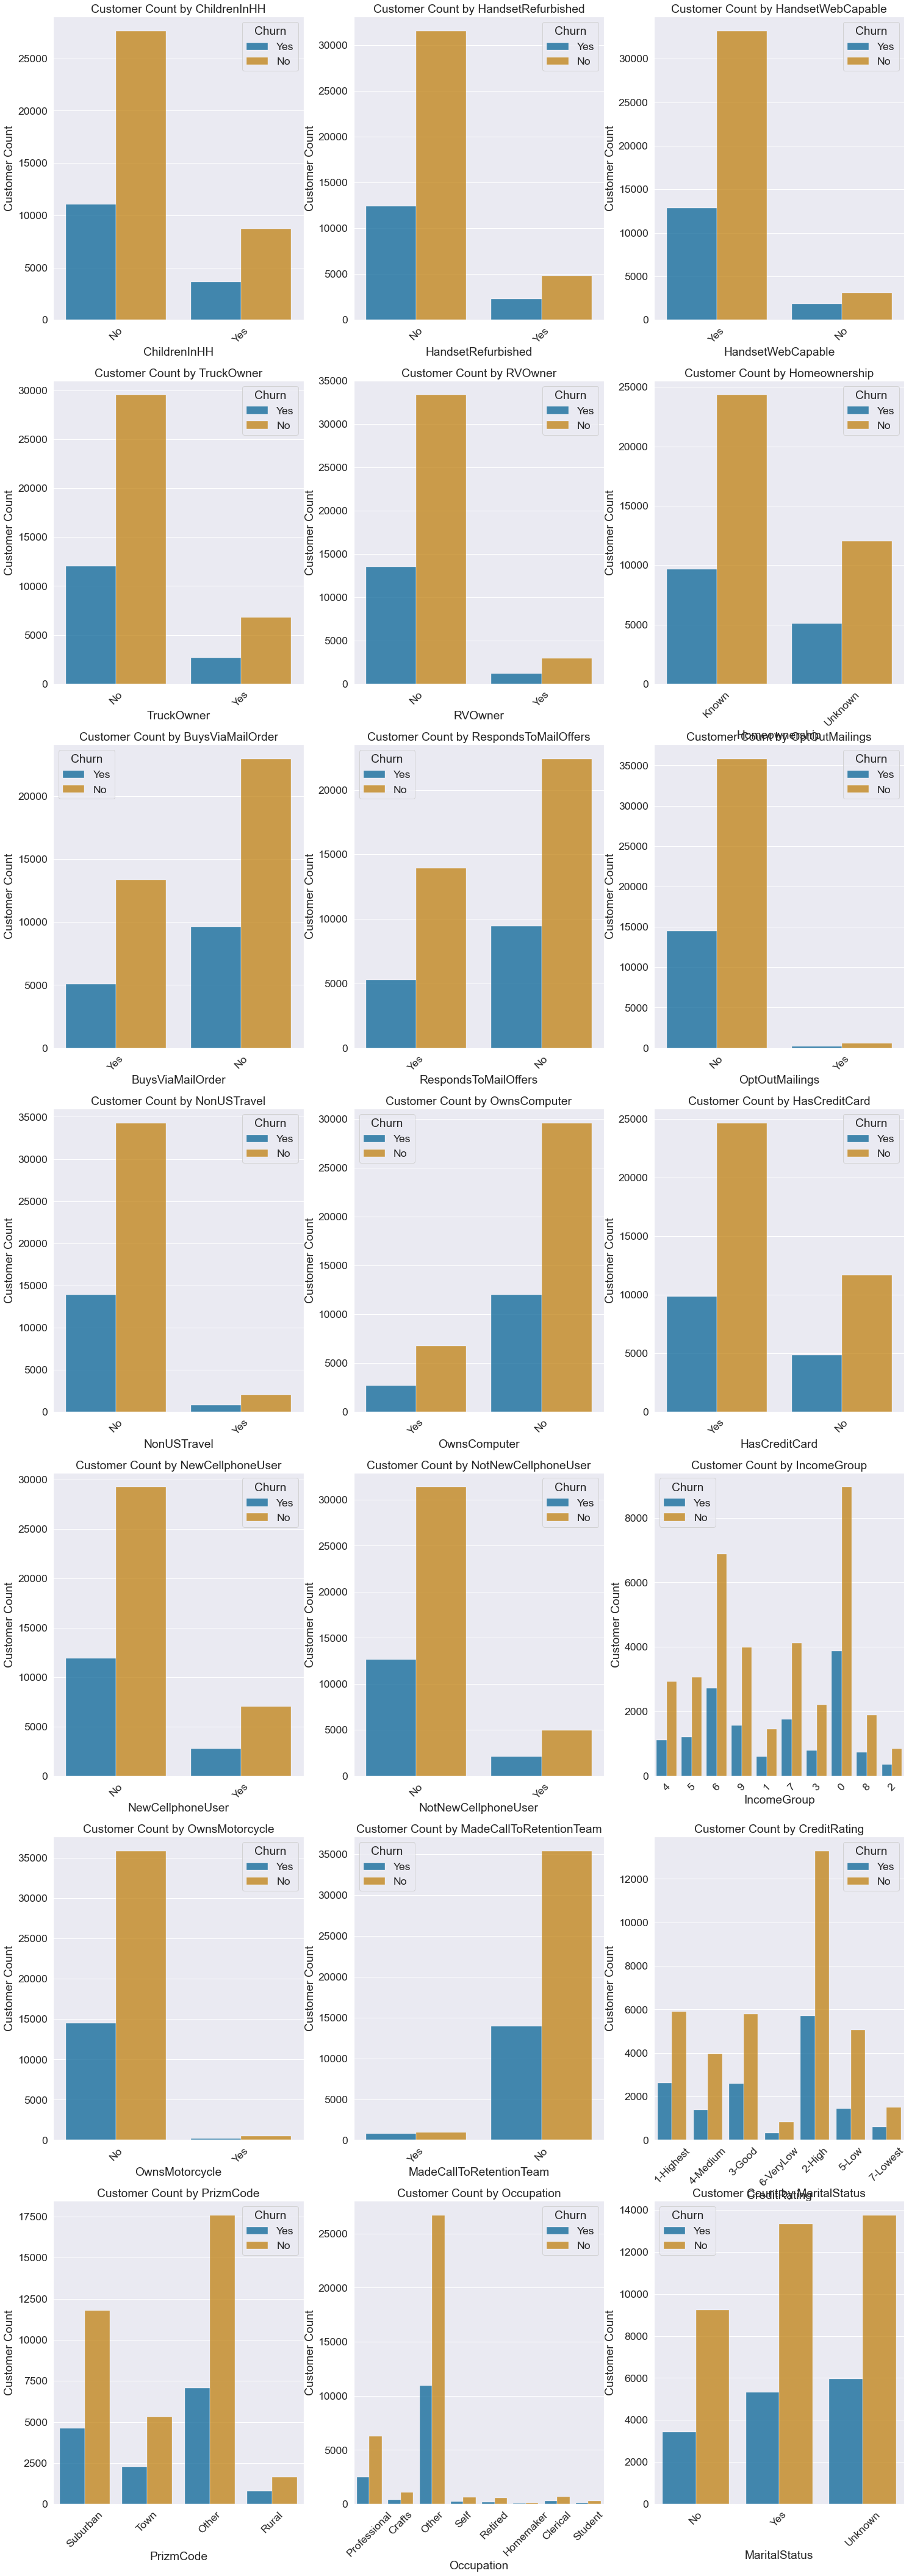

In [17]:
#select non-numeric variables
df_non_numeric = train.select_dtypes(exclude='number')
#select the column names and convert to a list
df_non_numeric_columns = list(df_non_numeric.columns)
#select the columns, excluding the first two (Churn & ServiceAreaCode)
feature_obj = list(enumerate(df_non_numeric_columns[2:]))


plt.figure(figsize = (25,75))
sns.set(font_scale = 1.6)

for i in feature_obj:
    plt.subplot(7,3,i[0]+1)
    sns.countplot(x = i[1],
                  hue='Churn',
                  data = train,
                  palette='colorblind',
                  linewidth=0.4,
                  alpha=0.8
                 )
    
    plt.ylabel('Customer Count')
    plt.title('Customer Count by '+str(i[1]))
    plt.xticks(rotation = 45)

#### Review Variables that may be directly linked:
    - HandsetWebCapable vs HandsetRefurbished
    - NewCellphoneUser vs NotNewCellphoneUser
    - OwnsMotorCycle vs Churn

In [18]:
pd.crosstab(train.HandsetRefurbished, train.HandsetWebCapable, normalize=True)

HandsetWebCapable,No,Yes
HandsetRefurbished,,
No,0.078966,0.781436
Yes,0.018221,0.121378


In [19]:
pd.crosstab(train.NewCellphoneUser, train.NotNewCellphoneUser, normalize=True)

NotNewCellphoneUser,No,Yes
NewCellphoneUser,,
No,0.668338,0.138768
Yes,0.192895,0.000000


In [20]:
# 98% of users do not own a motorcycle, and the churn rate is not skewed - Remove
print(pd.value_counts(train['OwnsMotorcycle'], normalize=True), '\n\n')

print(pd.crosstab(train.OwnsMotorcycle, train.Churn, normalize=True))

No     0.986553
Yes    0.013447
Name: OwnsMotorcycle, dtype: float64 


Churn                 No       Yes
OwnsMotorcycle                    
No              0.702834  0.283878
Yes             0.009075  0.004214


In [21]:
print(pd.crosstab(train.OwnsMotorcycle, train.Churn, normalize=True))

Churn                 No       Yes
OwnsMotorcycle                    
No              0.702834  0.283878
Yes             0.009075  0.004214


<b> Action to Take: </b>: Remove the following columns based on the review conducted above:

    1) HandsetRefurbished
    2) NotNewCellphoneUser
    3) OwnsMotorcycle

In [22]:
train.loc[train['CreditRating']=='1-Highest', 'CreditRating'] = 'High'
train.loc[train['CreditRating']=='2-High', 'CreditRating'] = 'High'
train.loc[train['CreditRating']=='3-Good', 'CreditRating'] = 'Medium'
train.loc[train['CreditRating']=='4-Medium', 'CreditRating'] = 'Medium'
train.loc[train['CreditRating']=='5-Low', 'CreditRating'] = 'Low'
train.loc[train['CreditRating']=='6-VeryLow', 'CreditRating'] = 'Low'
train.loc[train['CreditRating']=='7-Lowest', 'CreditRating'] = 'Low'

pd.value_counts(train['CreditRating'], 
                dropna=False)

High      38243
Medium    19100
Low       13675
Name: CreditRating, dtype: int64

In [23]:
# Remove highly correlated columns
train = train.drop(['HandsetRefurbished',
                    'NotNewCellphoneUser',
                    'OwnsMotorcycle'
                   ],
                   axis=1)

### Review Numerical Column Vales

#### High-Level Visual to Assess Correlations in the Dataset

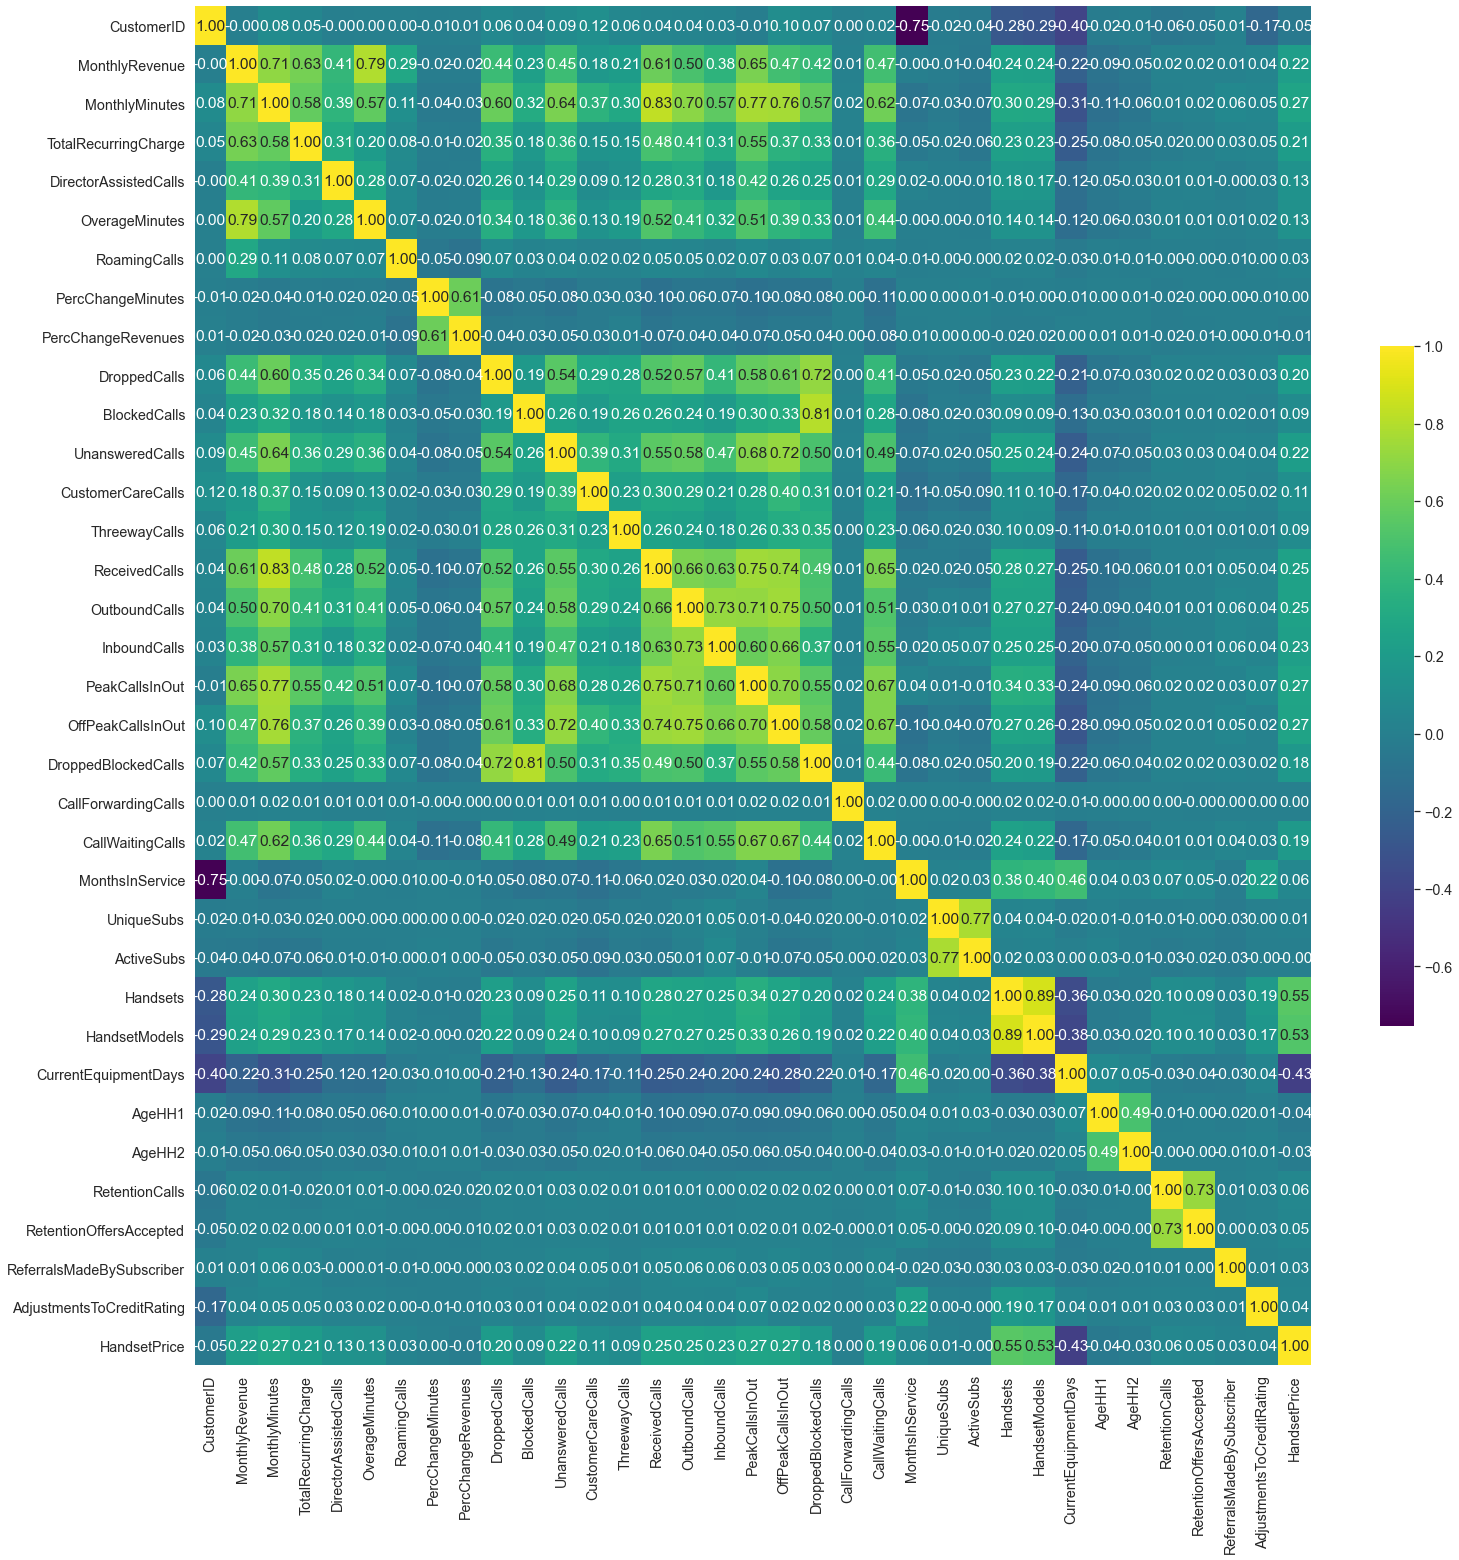

In [24]:
# df_numeric = train.select_dtypes(include='number')
# df_numeric_columns = list(df_numeric.columns[1:])

def corrplot(df):
    plt.figure(figsize = (25,25))
    sns.set(font_scale = 1.3)
    sns.heatmap(df.corr(), 
                annot = True, 
                fmt = '.2f',
                cmap= 'viridis',
                cbar_kws={'shrink': .5})
    
corrplot(train)

In [25]:
# Output any correlation values over 0.65 - isolating high-correlated variables to remove from the analysis
def high_corr_and_check(X):
    corr_matrix = X.corr().abs()
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), 
                                     k=1).astype(np.bool))
                      .stack()
                      .sort_values(ascending=False))
    for index, value in sol.items():
        if value > 0.65:
            print(index,value)
            
high_corr_and_check(train)

('Handsets', 'HandsetModels') 0.8894661096166538
('MonthlyMinutes', 'ReceivedCalls') 0.8319004851305072
('BlockedCalls', 'DroppedBlockedCalls') 0.8069473711205577
('MonthlyRevenue', 'OverageMinutes') 0.7886364348449827
('UniqueSubs', 'ActiveSubs') 0.7747563878732185
('MonthlyMinutes', 'PeakCallsInOut') 0.771302742427461
('MonthlyMinutes', 'OffPeakCallsInOut') 0.7646747787298446
('CustomerID', 'MonthsInService') 0.753358306238284
('OutboundCalls', 'OffPeakCallsInOut') 0.7470620536861017
('ReceivedCalls', 'PeakCallsInOut') 0.7468878525992729
('ReceivedCalls', 'OffPeakCallsInOut') 0.7386534176488169
('RetentionCalls', 'RetentionOffersAccepted') 0.7292186689909199
('OutboundCalls', 'InboundCalls') 0.7256978344889192
('UnansweredCalls', 'OffPeakCallsInOut') 0.7207413154082051
('DroppedCalls', 'DroppedBlockedCalls') 0.7176222834397297
('OutboundCalls', 'PeakCallsInOut') 0.7134923016907486
('MonthlyRevenue', 'MonthlyMinutes') 0.7114964504356175
('MonthlyMinutes', 'OutboundCalls') 0.6981357073

<b>Action to take:</b> After reviewing the correlation output, I have decided to initially remove a number of columns from future analysis. Since there is a high correlation, the associated variable should provide enough importance for the analysis.

In [26]:
# Remove highly correlated columns
train = train.drop(['HandsetModels', 
                    'ReceivedCalls',
                    'DroppedBlockedCalls',
                    'OverageMinutes',
                    'UniqueSubs',
                    'PeakCallsInOut',
                    'OffPeakCallsInOut',
                    'RetentionOffersAccepted',
                    'InboundCalls',
                    'OutboundCalls', 
                    'CallWaitingCalls',
                    'AgeHH2'],
                   axis=1)

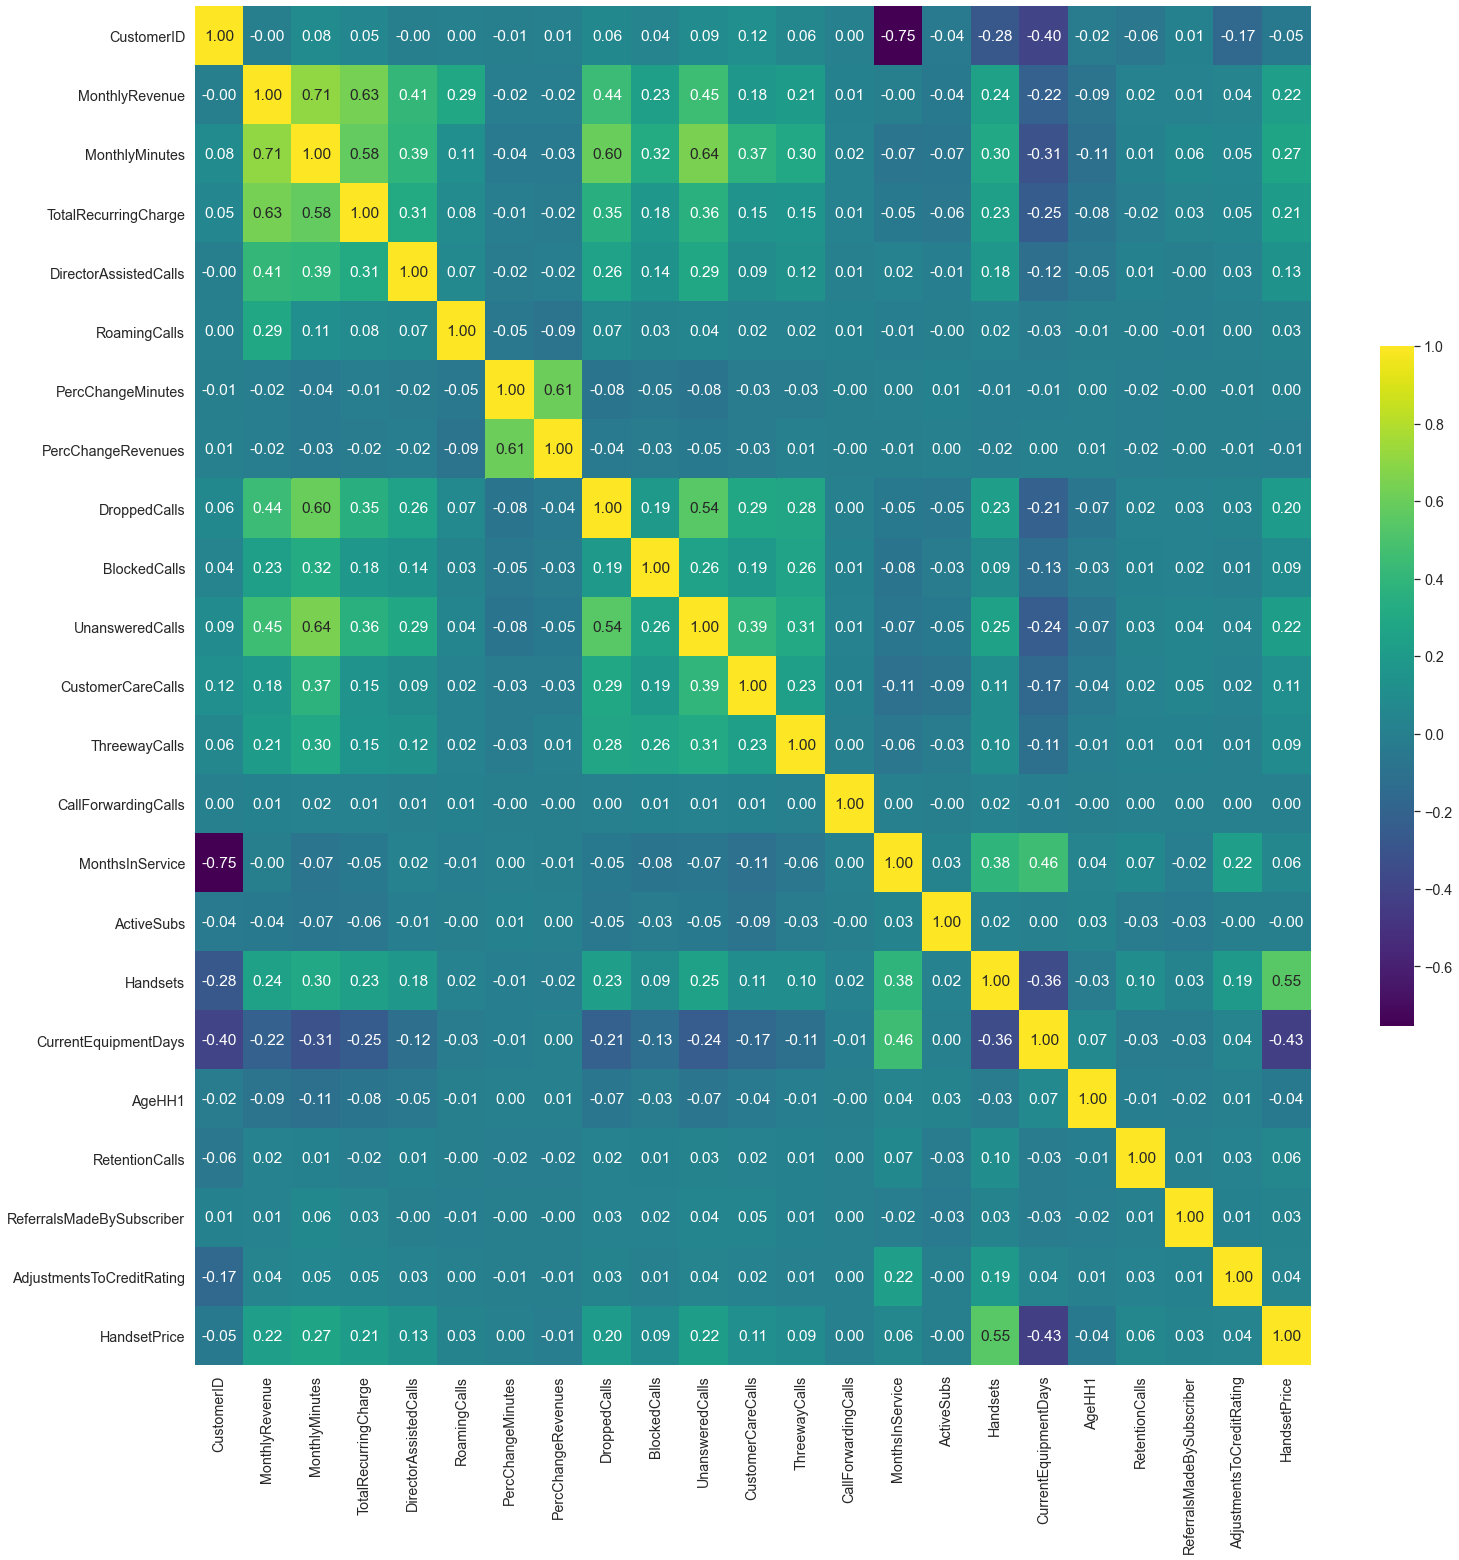

In [27]:
corrplot(train)

In [28]:
train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
CustomerID,71018.0,3.201965e+06,116803.095371,3000002.00,3.100575e+06,3201512.00,3304952.00,3399994.00
MonthlyRevenue,71018.0,5.882038e+01,44.182136,-6.17,3.369250e+01,48.53,70.91,1223.38
MonthlyMinutes,71018.0,5.252250e+02,529.412252,0.00,1.590000e+02,366.00,720.00,7668.00
TotalRecurringCharge,71018.0,4.685730e+01,23.878967,-11.00,3.000000e+01,45.00,60.00,400.00
DirectorAssistedCalls,71018.0,8.927324e-01,2.194436,0.00,0.000000e+00,0.25,0.99,159.39
RoamingCalls,71018.0,1.218774e+00,9.069238,0.00,0.000000e+00,0.00,0.30,1112.40
PercChangeMinutes,71018.0,-1.083383e+01,254.425423,-3875.00,-8.200000e+01,-5.00,65.00,5192.00
PercChangeRevenues,71018.0,-1.203991e+00,38.633667,-1107.70,-7.000000e+00,-0.30,1.50,2483.50
DroppedCalls,71018.0,6.009485e+00,9.007455,0.00,7.000000e-01,3.00,7.70,221.70
BlockedCalls,71018.0,4.065241e+00,10.670202,0.00,0.000000e+00,1.00,3.70,384.30


#### Remove Outliers from Selected Numerical Columns:
    - MonthlyRevenue
    - MonthlyMinutes
    - TotalRecurringCharge
    - CurrentEquipmentDays

In [29]:
#select numeric variables
df_numeric = train.select_dtypes(include='number')[['MonthlyRevenue',
                                                    'MonthlyMinutes',
                                                    'TotalRecurringCharge',
                                                    'CurrentEquipmentDays']].columns
#select the columns, excluding the first (CustomerID); Also assign a number index
# to loop in the below function
feature_num = list(enumerate(df_numeric))
feature_num

[(0, 'MonthlyRevenue'),
 (1, 'MonthlyMinutes'),
 (2, 'TotalRecurringCharge'),
 (3, 'CurrentEquipmentDays')]

A data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. 

Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. 

Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [30]:
# #Outliers Methodology
# def detect_outliers(df, n, features):
#     """"
#     This function will loop through a list of features and detect outliers in each one of those features. In each
#     loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
#     third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
#     outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
#     feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
#     indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
#     """
#     outlier_indices = [] 
#     for col in features: 
#         Q1 = np.percentile(df[col], 25)
#         Q3 = np.percentile(df[col], 75)
#         IQR = Q3 - Q1
#         outlier_step = 1.5 * IQR 
#         outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
#         outlier_indices.extend(outlier_list_col) 
#     outlier_indices = Counter(outlier_indices)
#     multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
#     return multiple_outliers

In [31]:
# outliers_to_drop = detect_outliers(train, 1.5, df_numeric)
# print("We will drop {} rows. The specific rows are in the cell below ".format(len(outliers_to_drop)))

In [32]:
# train.loc[outliers_to_drop, :]

In [33]:
# # Drop outliers and reset index
# print("Before: {} rows".format(len(train)))
# train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
# print("After: {} rows".format(len(train)))

#### Assess Summary Statistics Once Outliers Removed

In [34]:
# Create a distribution chart assessing churn
def distplot(data, col, bins=[]):
    sns.set(font_scale = 1.3)
    sns.set_style('ticks')
    sns.displot(data=data,
                x=col,
                hue='Churn',
                bins=bins)
    
    plt.axvline(data[col].mean(),
                label = 'Mean '+str(col),
                linewidth=2,
               color='blue')
    
    plt.ylabel('Customer Count')
    plt.title(str(col) + ' Distribution')
    plt.xticks(rotation = 45)

    plt.show()

In [35]:
train.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
CustomerID,71018.0,3.201965e+06,116803.095371,3000002.00,3.100575e+06,3201512.00,3304952.00,3399994.00
MonthlyRevenue,71018.0,5.882038e+01,44.182136,-6.17,3.369250e+01,48.53,70.91,1223.38
MonthlyMinutes,71018.0,5.252250e+02,529.412252,0.00,1.590000e+02,366.00,720.00,7668.00
TotalRecurringCharge,71018.0,4.685730e+01,23.878967,-11.00,3.000000e+01,45.00,60.00,400.00
DirectorAssistedCalls,71018.0,8.927324e-01,2.194436,0.00,0.000000e+00,0.25,0.99,159.39
RoamingCalls,71018.0,1.218774e+00,9.069238,0.00,0.000000e+00,0.00,0.30,1112.40
PercChangeMinutes,71018.0,-1.083383e+01,254.425423,-3875.00,-8.200000e+01,-5.00,65.00,5192.00
PercChangeRevenues,71018.0,-1.203991e+00,38.633667,-1107.70,-7.000000e+00,-0.30,1.50,2483.50
DroppedCalls,71018.0,6.009485e+00,9.007455,0.00,7.000000e-01,3.00,7.70,221.70
BlockedCalls,71018.0,4.065241e+00,10.670202,0.00,0.000000e+00,1.00,3.70,384.30


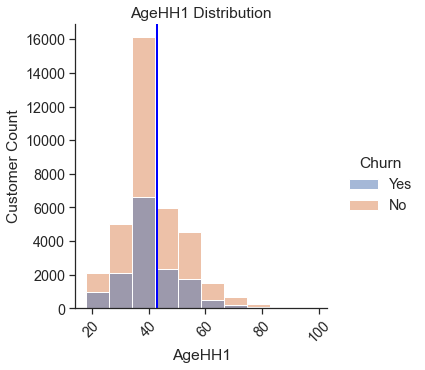

In [36]:
distplot(train, 'AgeHH1', 10)

##### Revenue/ Usage Related Variables

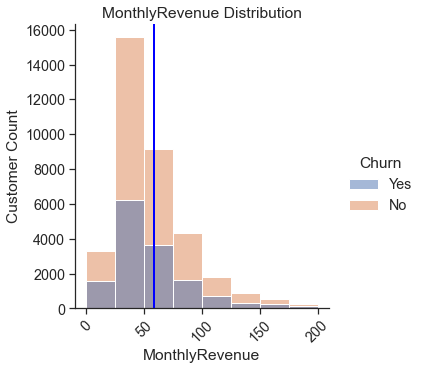

In [34]:
bins = [0,25,50,75,100,125,150,175,200]
distplot(train, 'MonthlyRevenue', bins)

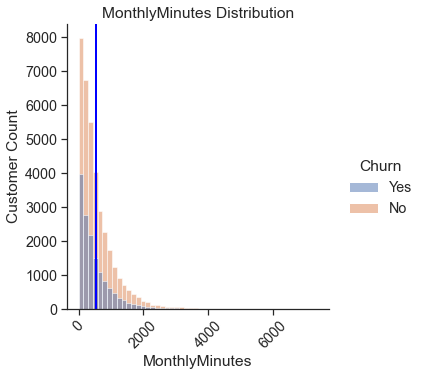

In [35]:
distplot(train, 'MonthlyMinutes', 50)


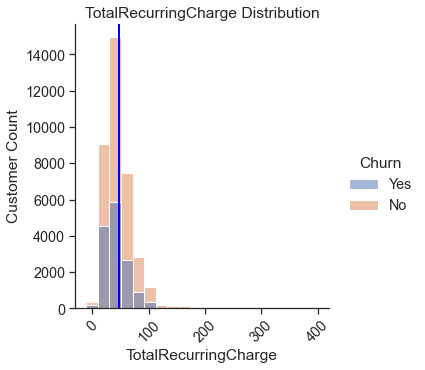

In [36]:
# bins = [0,10,20,30,40,50,60,70,80,90,100]
distplot(train, 'TotalRecurringCharge', 20)

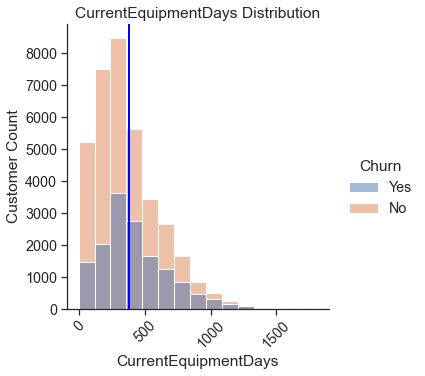

In [37]:
distplot(train, 'CurrentEquipmentDays', 15)


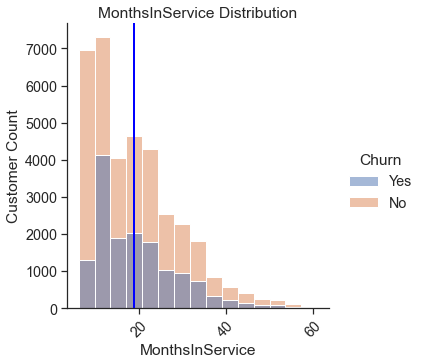

In [38]:
distplot(train, 'MonthsInService', 15)

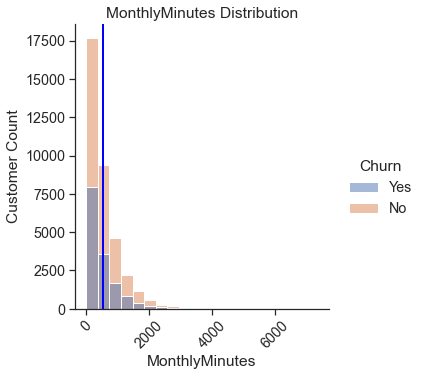

In [39]:
distplot(train, 'MonthlyMinutes', 20)

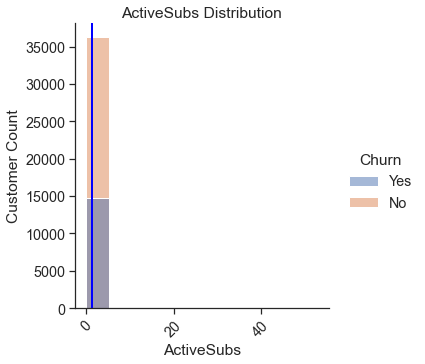

In [40]:
distplot(train, 'ActiveSubs', 10)

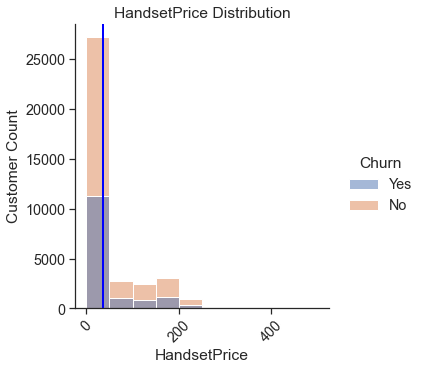

In [41]:
distplot(train, 'HandsetPrice', 10)

##### Miscellaneous Usage Variables

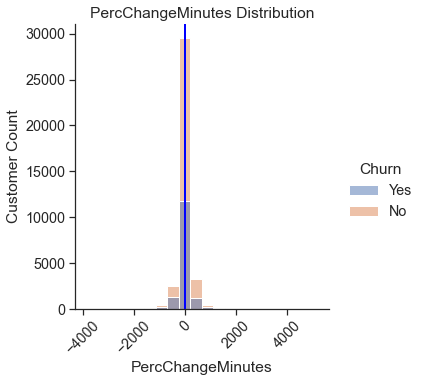

In [42]:
distplot(train, 'PercChangeMinutes', 20)


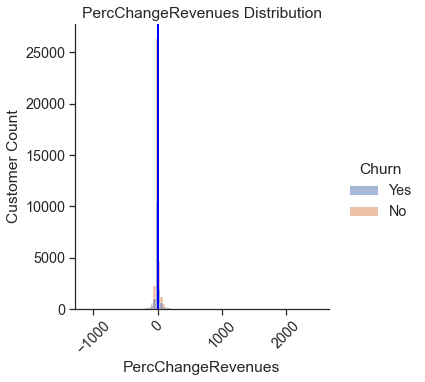

In [43]:
distplot(train, 'PercChangeRevenues', 100)

In [44]:
train.loc[train['PercChangeRevenues'] == 0, 'RevenuesChange'] = 'No Change'
train.loc[train['PercChangeRevenues'] > 0, 'RevenuesChange'] = 'Increase'
train.loc[train['PercChangeRevenues'] < 0, 'RevenuesChange'] = 'Decrease'

print(pd.value_counts(train['RevenuesChange']))

Decrease     40097
Increase     22822
No Change     8099
Name: RevenuesChange, dtype: int64


In [45]:
train.loc[train['PercChangeMinutes'] == 0, 
          'MinutesChange'] = 'No Change'
train.loc[(train['PercChangeMinutes'] >= np.percentile(train['PercChangeMinutes'], 25)) &
          (train['PercChangeMinutes'] < 0), 
          'MinutesChange'] = 'Decrease'
train.loc[train['PercChangeMinutes'] < np.percentile(train['PercChangeMinutes'], 25),
          'MinutesChange'] = 'Large Decrease'
train.loc[(train['PercChangeMinutes'] <= np.percentile(train['PercChangeMinutes'], 75)) &
          (train['PercChangeMinutes'] > 0), 
          'MinutesChange'] = 'Increase'
train.loc[train['PercChangeMinutes'] > np.percentile(train['PercChangeMinutes'], 75),
          'MinutesChange'] = 'Large Increase'

print(pd.value_counts(train['MinutesChange']))

Decrease          20102
Large Decrease    17687
Large Increase    17676
Increase          14001
No Change          1552
Name: MinutesChange, dtype: int64


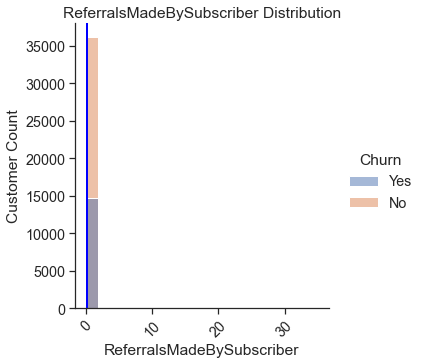

In [46]:
distplot(train, 'ReferralsMadeBySubscriber', 20)

In [47]:
train.loc[train['ReferralsMadeBySubscriber'] == 0, 'ReferralsMade'] = 'No'
train.loc[train['ReferralsMadeBySubscriber'] > 0, 'ReferralsMade'] = 'Yes'

print(pd.value_counts(train['ReferralsMade']))

No     67759
Yes     3259
Name: ReferralsMade, dtype: int64


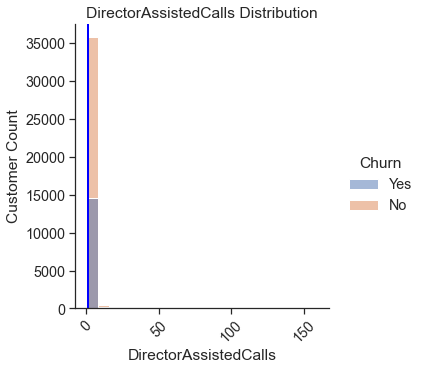

In [48]:
distplot(train, 'DirectorAssistedCalls', 20)

In [49]:
train.loc[train['DirectorAssistedCalls'] == 0, 'DirectorAssistedCallsMade'] = 'No'
train.loc[train['DirectorAssistedCalls'] > 0, 'DirectorAssistedCallsMade'] = 'Yes'

print(pd.value_counts(train['DirectorAssistedCallsMade']))

Yes    36923
No     34095
Name: DirectorAssistedCallsMade, dtype: int64


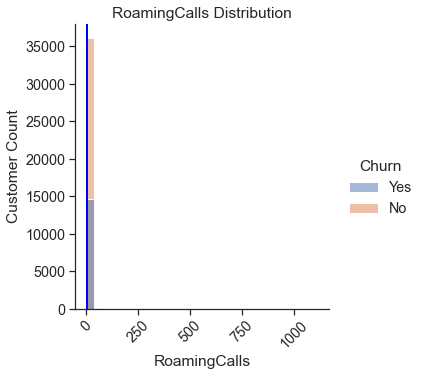

In [50]:
distplot(train, 'RoamingCalls', 30)

In [51]:
train.loc[train['RoamingCalls'] == 0, 'RoamingCallsMade'] = 'No'
train.loc[train['RoamingCalls'] > 0, 'RoamingCallsMade'] = 'Yes'

print(pd.value_counts(train['RoamingCallsMade']))

No     48778
Yes    22240
Name: RoamingCallsMade, dtype: int64


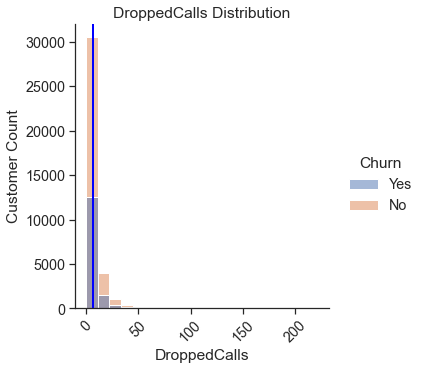

In [52]:
distplot(train, 'DroppedCalls', 20) #NO

In [53]:
train.loc[train['DroppedCalls'] == 0, 'ExperiencedDroppedCalls'] = 'No'
train.loc[train['DroppedCalls'] > 0, 'ExperiencedDroppedCalls'] = 'Yes'

print(pd.value_counts(train['ExperiencedDroppedCalls']))

Yes    60291
No     10727
Name: ExperiencedDroppedCalls, dtype: int64


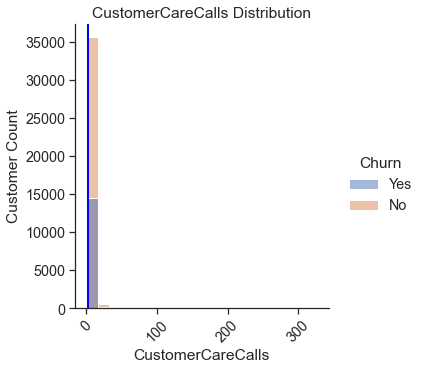

In [54]:
distplot(train, 'CustomerCareCalls', 20)

In [55]:
train.loc[train['CustomerCareCalls'] == 0, 'CustomerCareCallsMade'] = 'No'
train.loc[train['CustomerCareCalls'] > 0, 'CustomerCareCallsMade'] = 'Yes'

print(pd.value_counts(train['CustomerCareCallsMade']))

No     38919
Yes    32099
Name: CustomerCareCallsMade, dtype: int64


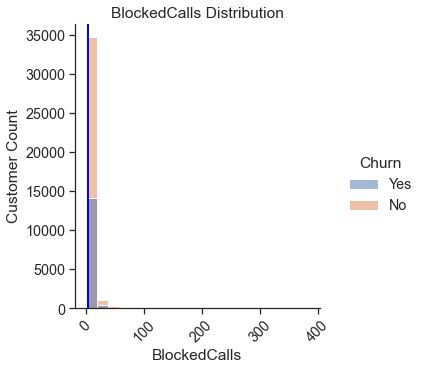

In [56]:
distplot(train, 'BlockedCalls', 20)

In [57]:
train.loc[train['BlockedCalls'] == 0, 'BlockedCallsMade'] = 'No'
train.loc[train['BlockedCalls'] > 0, 'BlockedCallsMade'] = 'Yes'

print(pd.value_counts(train['BlockedCallsMade']))

Yes    51604
No     19414
Name: BlockedCallsMade, dtype: int64


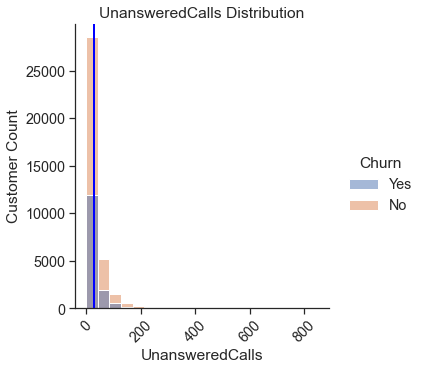

In [58]:
distplot(train, 'UnansweredCalls', 20)

In [59]:
train.loc[train['UnansweredCalls'] == 0, 'UnansweredCallsReceived'] = 'No'
train.loc[train['UnansweredCalls'] > 0, 'UnansweredCallsReceived'] = 'Yes'

print(pd.value_counts(train['UnansweredCallsReceived']))

Yes    64181
No      6837
Name: UnansweredCallsReceived, dtype: int64


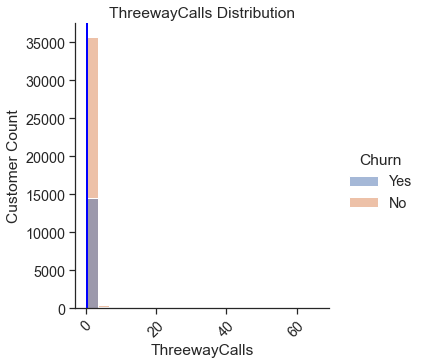

In [60]:
distplot(train, 'ThreewayCalls', 20)


In [61]:
train.loc[train['ThreewayCalls'] == 0, 'ThreewayCallsMade'] = 'No'
train.loc[train['ThreewayCalls'] > 0, 'ThreewayCallsMade'] = 'Yes'

print(pd.value_counts(train['ThreewayCallsMade']))

No     51621
Yes    19397
Name: ThreewayCallsMade, dtype: int64


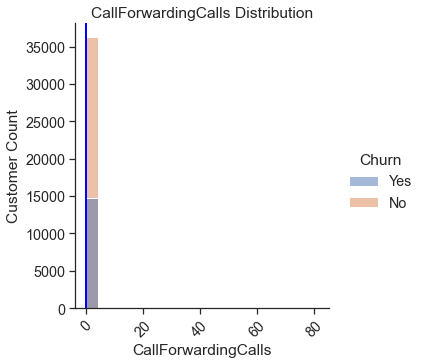

In [62]:
distplot(train, 'CallForwardingCalls', 20)

In [63]:
train.loc[train['CallForwardingCalls'] == 0, 'CallForwardingCallsMade'] = 'No'
train.loc[train['CallForwardingCalls'] > 0, 'CallForwardingCallsMade'] = 'Yes'

print(pd.value_counts(train['CallForwardingCallsMade']))

No     70698
Yes      320
Name: CallForwardingCallsMade, dtype: int64


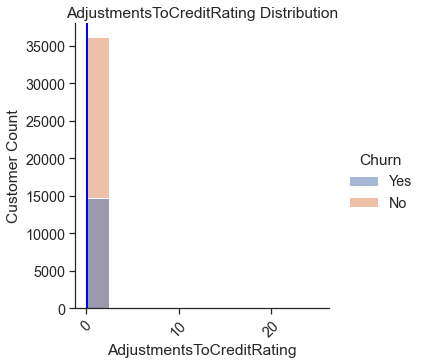

In [64]:
distplot(train, 'AdjustmentsToCreditRating', 10)

In [65]:
train.loc[train['AdjustmentsToCreditRating'] == 0, 'AdjustmentsToCreditRatingMade'] = 'No'
train.loc[train['AdjustmentsToCreditRating'] > 0, 'AdjustmentsToCreditRatingMade'] = 'Yes'

print(pd.value_counts(train['AdjustmentsToCreditRatingMade']))

No     68499
Yes     2519
Name: AdjustmentsToCreditRatingMade, dtype: int64


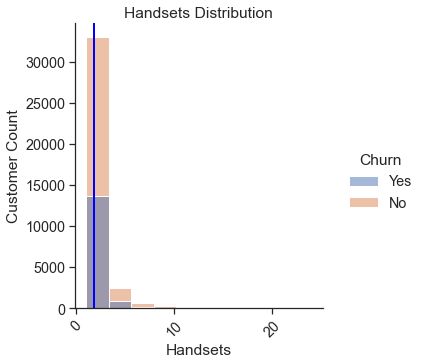

In [66]:
distplot(train, 'Handsets', 10)

<b> Action to Take: </b>: 

Convert the following columns to binary values based on the review conducted above:

    1) DirectorAssistedCalls
    2) RoamingCalls
    3) DroppedCalls
    4) BlockedCalls
    5) UnansweredCalls
    6) CustomerCareCalls
    7) ThreewayCalls
    8) CallForwardingCalls
    9) ReferralsMadeBySubscriber ---> ReferralsMade
    10) RetentionCalls ---> RetentionCallMade

Convert the following columns to categorical binned values based on the review conducted below:

    1) PercChangeMinutes (Large Increase, Slight Increase, No Change, Slight Decrease, Large Decreased)
    2) PercChangeMinutes (Increase, No Change, Decrease)
    3) RoamingCalls 

<b> Action to Take: </b>: Remove the following columns based on the review conducted above:

    1) DirectorAssistedCalls
    2) RoamingCalls
    3) DroppedCalls
    4) BlockedCalls
    5) UnansweredCalls
    6) CustomerCareCalls
    7) ThreewayCalls 
    8) CallForwardingCalls
    9) ReferralsMadeBySubscriber ---> ReferralsMade
    10) PercChangeMinutes (Large Increase, Slight Increase, No Change, Slight Decrease, Large Decreased)
    11) PercChangeMinutes (Increase, No Change, Decrease)
    12) AdjustmentsToCreditRating
    13) Handsets (Remove due to everyone having a handset)

In [67]:
# Remove highly correlated columns
train = train.drop(['DirectorAssistedCalls',
                    'RoamingCalls',
                    'DroppedCalls',
                    'BlockedCalls',
                    'UnansweredCalls',
                    'CustomerCareCalls',
                    'ThreewayCalls',
                    'CallForwardingCalls',
                    'ReferralsMadeBySubscriber',
                    'RetentionCalls',
                    'PercChangeRevenues',
                    'PercChangeMinutes',
                    'AdjustmentsToCreditRating',
                    'Handsets'
                   ],
                   axis=1)

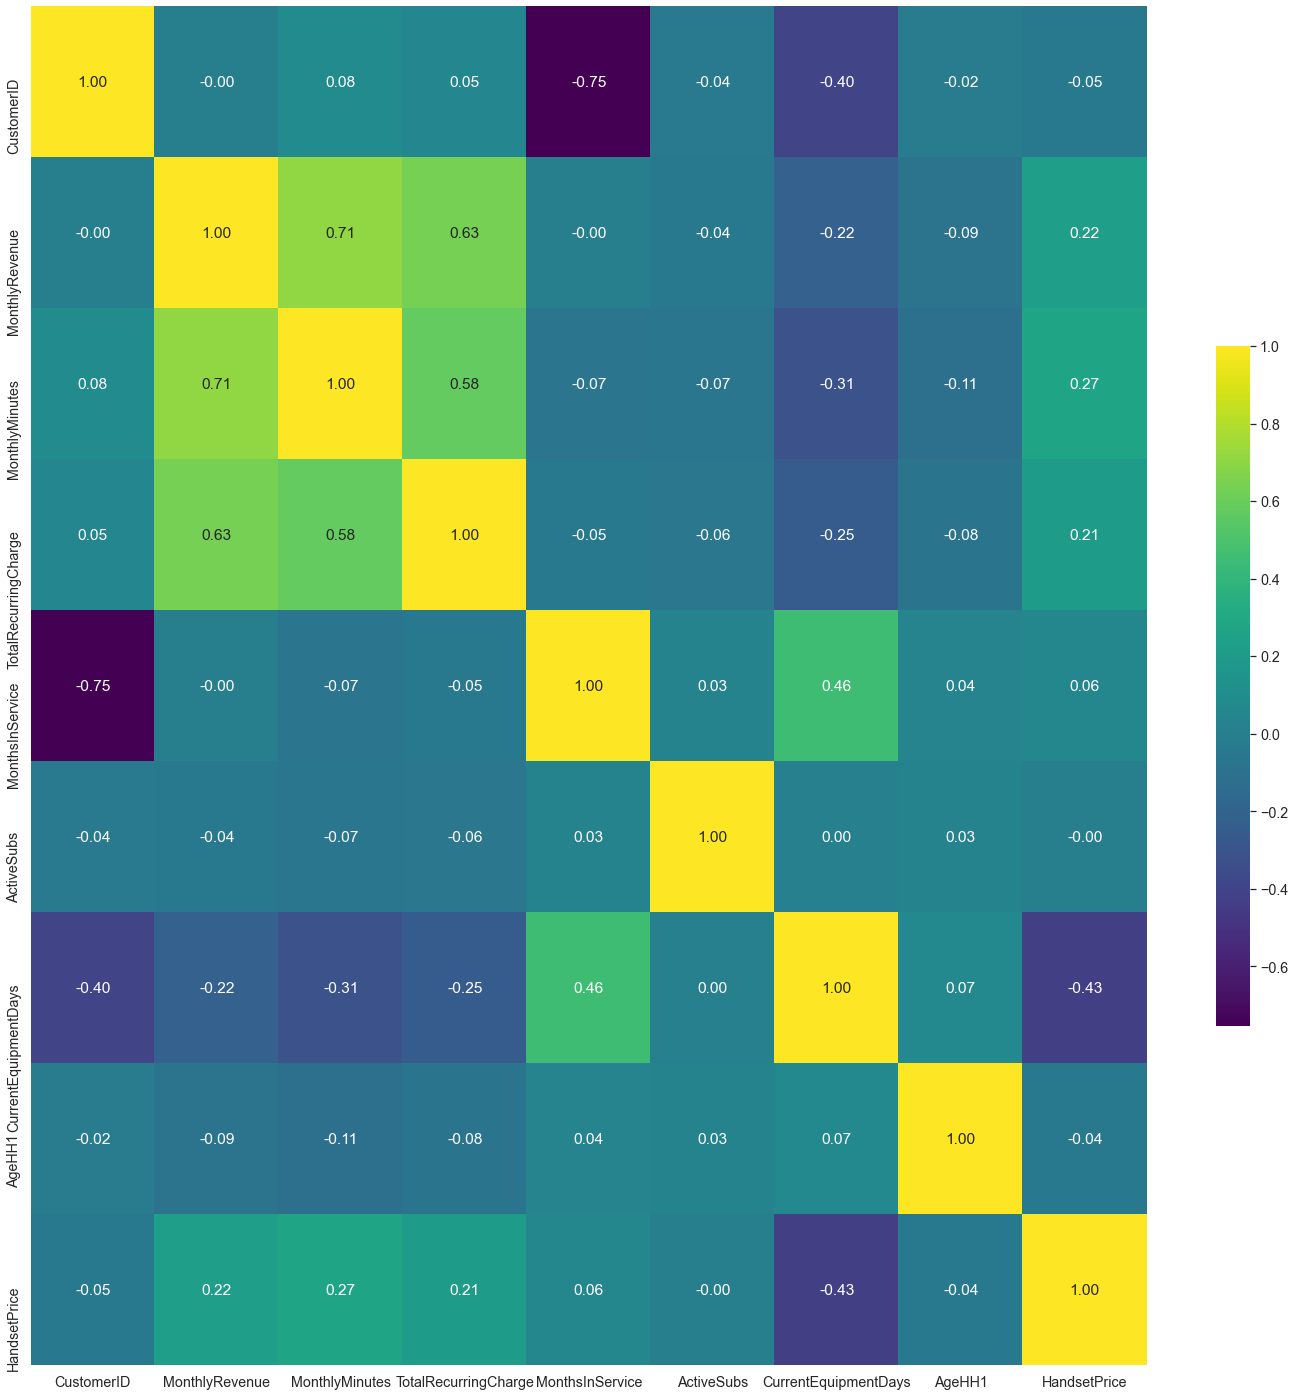

In [68]:
corrplot(train)

In [69]:
high_corr_and_check(train)

('CustomerID', 'MonthsInService') 0.753358306238284
('MonthlyRevenue', 'MonthlyMinutes') 0.7114964504356175


# Export to 'Modified Folder' - Import File to Modeling Notebook (Part 2)

In [70]:
train.to_csv('../data/modified/cell2celltrain_1.csv', index=False)